In [1]:
#chargement des modules pour le DL
import tensorflow as tf
from tensorflow import keras

#chargement des modules pour les données et leur preprocessing
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#importation des données
housing = fetch_california_housing()

In [3]:
#description du jeu de données
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
#construction des tensors
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [5]:
#construction du jeu de données de validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [6]:
#normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
#construction du RNA avec l'api séquentiel
model = keras.models.Sequential([
    keras.layers.Dense(30, input_shape = (X_train.shape[1],), activation = "relu"),
    keras.layers.Dense(1)
])

In [8]:
#compilation du modèle
model.compile(optimizer="sgd", loss = "mean_squared_error")

In [9]:
#entrainement du modèle
history = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 20)

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.7695 - val_loss: 0.5755
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5266 - val_loss: 0.5245
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4761 - val_loss: 0.4770
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4539 - val_loss: 0.4696
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4428 - val_loss: 0.4599
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4341 - val_loss: 0.4540
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4296 - val_loss: 0.4534
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4241 - val_loss: 0.4402
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4186 - val_loss: 0.4345
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4139 - val_loss: 0.4318

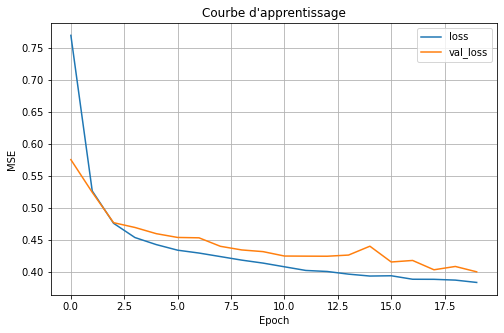

In [10]:
#courbe d'apprentissage
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5), grid = True, title = "Courbe d'apprentissage", xlabel = "Epoch",
                                  ylabel = "MSE")
plt.show()

In [11]:
#évaluation du modèle
model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3774


0.3774257004261017

In [12]:
#prédiction avec le modèle
X_new = X_test[:3]
model.predict(X_new)

array([[2.5139606],
       [1.9938184],
       [1.6566966]], dtype=float32)

In [13]:
#vraies étiquettes
y_test[:3]

array([2.224, 2.644, 1.693])